<center><h1><font color=yellow><i> Deep Learning </i></font></h1></center>

# $Import$ $Libraries$ :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import keras_tuner
import seaborn as sns

# $Data$ :

<b><font color="skyblue">Step 1:</font></b>
 
- Import **data** (pandas dataframe). 

In [19]:
df_ozone=pd.read_csv('ozone_complet_preprocessed.csv')
df_ozone.drop('Unnamed: 0', axis=1, inplace=True)
df_ozone.head()

,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,Ne15,...,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v,maxO3l
0,47.6,10.1,11.6,13.3,13.6,12.2,8.0,8.0,8.0,8.0,...,4.0,300.0,4.0,340.0,4.0,20.0,4.0,-3.4641,62.2,56.2
1,56.2,9.5,9.4,13.8,17.4,16.3,8.0,8.0,7.0,0.0,...,2.0,180.0,3.0,110.0,1.0,350.0,2.0,0.0000,47.6,61.8
2,61.8,3.6,8.0,16.8,21.5,20.2,4.0,5.0,2.0,2.0,...,2.0,340.0,1.0,170.0,2.0,170.0,3.0,-0.3420,56.2,50.8
3,50.8,9.5,10.5,11.4,12.2,11.4,8.0,7.0,7.0,7.0,...,4.0,350.0,3.0,350.0,3.0,350.0,4.0,-0.5209,61.8,59.8
4,59.8,9.8,10.8,13.8,14.3,13.3,8.0,7.0,8.0,8.0,...,2.0,280.0,1.0,320.0,3.0,350.0,4.0,-0.9848,50.8,53.4


<b><font color="skyblue">Step 2:</font></b>
 
- Vérificarion des valeurs nulles

In [3]:
# Vérification des valeurs manquantes dans votre DataFrame 'X'
missing_values = df_ozone.isnull().sum()

# Affichage des colonnes avec des valeurs manquantes
print("Colonnes avec des valeurs manquantes :")
print(missing_values[missing_values > 0])

Colonnes avec des valeurs manquantes :
maxO3     21
T6         1
T9         1
T12        1
T15        1
T18        1
Ne6        2
Ne9        2
Ne12       2
Ne15       2
Ne18       5
Vdir6      1
Vvit6      1
Vdir9      1
Vvit9      1
Vdir12     1
Vvit12     1
Vdir15     1
Vvit15     1
Vdir18     1
Vvit18     1
Vx         1
maxO3v    30
dtype: int64


<b><font color="skyblue">Step 3:</font></b>

Vérification des valeurs abérantes 


In [4]:
df_ozone.dropna(inplace=True)
y=df_ozone['maxO3l']
X=df_ozone.drop('maxO3l',axis=1)

<b><font color="skyblue">Step 3:</font></b>
 
- Split our data into **train data** (80% -- 3680 rows) and **test data** (921 rows). 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# $DNN$

## $Building$ $our$ $Model$ : (Keras sans optimization des hyperparamètres)

## Model DNN : avec Polynomial Feature 2

In [6]:
from sklearn.preprocessing import PolynomialFeatures
X.dropna(inplace=True)
X_poly=PolynomialFeatures(2).fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, train_size=0.8)
X_poly.shape

(1346, 300)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_poly)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=42)


<b><font color="skyblue">Step 1:</font></b>
 
- Creation of our model using **Keras**.

In [13]:
model1 = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[X_train_poly.shape[1]], name='hidden_layer1'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.Dense(100, activation='relu', name='hidden_layer2'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.BatchNormalization(),
    
    layers.Dense(1, activation='linear', name='output_layer'),  # Changement de l'activation en 'sigmoid'
])

In [14]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 100)               30100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                      

<b><font color="skyblue">Step 2:</font></b>
 
- Precise the `optimizer`, the `loss-fonction` & the `metric`.

In [15]:
from keras.optimizers import Adam
model1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae'],
)

<b><font color="skyblue">Step 3:</font></b>
 
- Train the model.

In [16]:
hist = model1.fit(X_train,
                 y_train,
                 batch_size=32,
                 epochs=100,
                 validation_data=(X_test_poly,y_test))

Epoch 1/100


34/34 [==============================] - 2s 14ms/step - loss: 7661.1279 - mae: 84.8986 - val_loss: 1528296064.0000 - val_mae: 32014.7695
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 7475.3838 - mae: 84.2922 - val_loss: 1036485568.0000 - val_mae: 25572.2852
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 7259.9014 - mae: 83.3314 - val_loss: 697313984.0000 - val_mae: 21218.9707
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 6992.1108 - mae: 81.9202 - val_loss: 1385914624.0000 - val_mae: 29342.2285
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 6668.6777 - mae: 80.0694 - val_loss: 2090568832.0000 - val_mae: 34054.0273
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 6299.4097 - mae: 77.7208 - val_loss: 1584444416.0000 - val_mae: 27518.8262
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 5867.6343 - mae: 74.8416 - val_loss: 2445295616.000

In [17]:
mse = model1.evaluate(X_test, y_test)
print(f'Mean Squared Error on test set: {np.sqrt(mse)}')

1/9 [==>...........................] - ETA: 0s - loss: 291.1265 - mae: 13.1103

9/9 [==============================] - 0s 6ms/step - loss: 281.1023 - mae: 12.4503
Mean Squared Error on test set: [16.76610554  3.52849775]


In [13]:
history_df = pd.DataFrame(hist.history)
history_df.head()

,loss,mae,val_loss,val_mae
0,1920.640625,33.620052,1515.685669,31.919086
1,411.988708,15.710423,431.615234,15.967596
2,372.247833,15.068306,383.297791,15.026850
3,368.999084,14.958803,422.212341,16.845266
4,344.018311,14.658088,346.120850,14.236182


In [18]:
23*3 + 1

70

We'll plot the curve of the loss function (for training and validation) as a function of the number of epochs

Minimum validation loss: 273.91009521484375


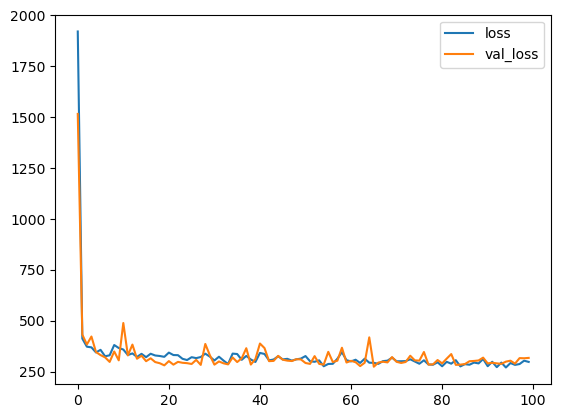

In [14]:
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

9/9 [==============================] - 1s 4ms/step


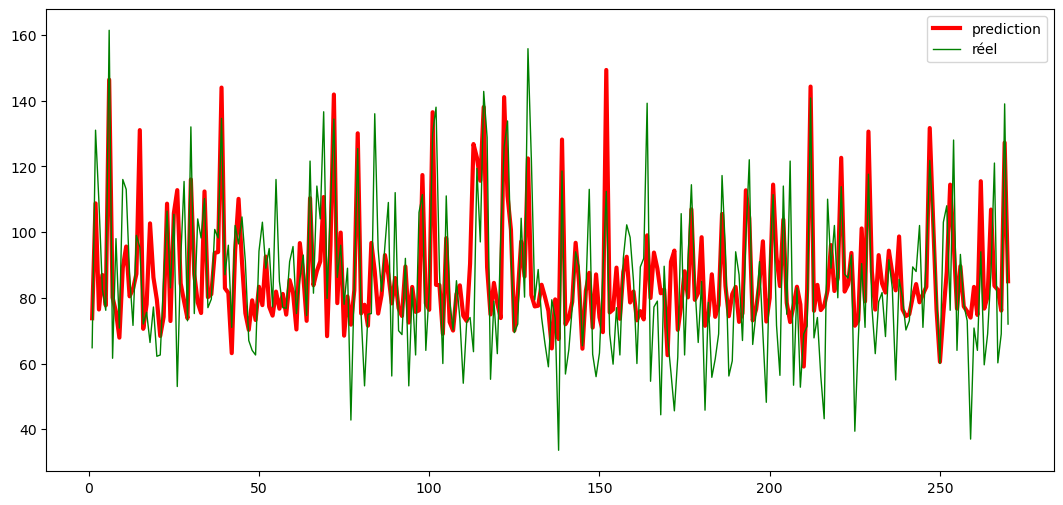

In [33]:
x=range(1, len(y_test) + 1)
y=y_test
plt.figure(figsize=(13, 6))
# plt.scatter(x,y)
# X_poly=PolynomialFeatures(3).fit_transform(x)

# model=LinearRegression().fit(x,y)
# model2=LinearRegression().fit(X_poly,y)
y_pred=model1.predict(X_test_poly)
# y_pred2=model2.predict(X_poly)
plt.plot(x,y_pred,c='r',lw=3,label='prediction')
plt.plot(x,y_test,c='g',lw=1,label='réel')
plt.legend()
plt.show()

 1/35 [..............................] - ETA: 1s

35/35 [==============================] - 0s 5ms/step


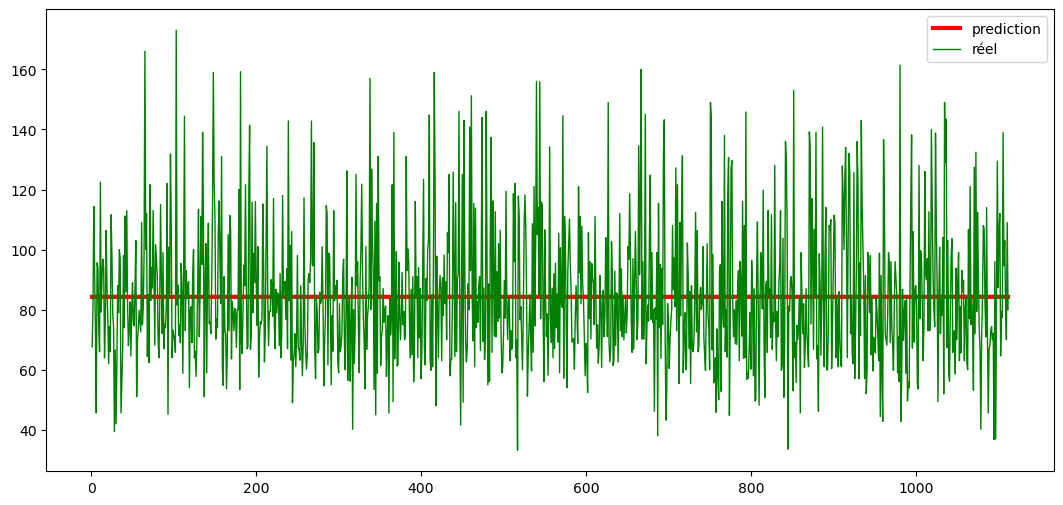

In [170]:
x=range(1, len(y_train) + 1)
y=y_train
plt.figure(figsize=(13, 6))
# plt.scatter(x,y)
# X_poly=PolynomialFeatures(3).fit_transform(x)

# model=LinearRegression().fit(x,y)
# model2=LinearRegression().fit(X_poly,y)
y_pred=model1.predict(X_train)
# y_pred2=model2.predict(X_poly)
plt.plot(x,y_pred,c='r',lw=3,label='prediction')
plt.plot(x,y_train,c='g',lw=1,label='réel')
plt.legend()
plt.show()

## Model DNN : normalisation et polynomial 2

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_poly)
print(scaled_features.shape, y.shape)
X_train_norm_poly, X_test_norm_poly, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=42)


(1346, 300) (1346,)


In [39]:
model2 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train_poly.shape[1]], name='hidden_layer1'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.Dense(32, activation='relu', name='hidden_layer2'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.BatchNormalization(),
    layers.Dense(1, activation='linear', name='output_layer'),  # Changement de l'activation en 'sigmoid'
])

In [40]:
model2.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae'],
)

In [45]:
hist = model2.fit(X_train_poly,
                 y_train,
                 batch_size=32,
                 epochs=100,
                 validation_data=(X_test_poly,y_test))

Epoch 1/100


34/34 [==============================] - 3s 12ms/step - loss: 7761.5952 - mae: 84.9964 - val_loss: 7366.6748 - val_mae: 82.7551
Epoch 2/100
34/34 [==============================] - 0s 9ms/step - loss: 7711.8184 - mae: 84.7132 - val_loss: 7386.1187 - val_mae: 82.8604
Epoch 3/100
34/34 [==============================] - 0s 9ms/step - loss: 7649.9131 - mae: 84.3369 - val_loss: 7282.4541 - val_mae: 82.2318
Epoch 4/100
34/34 [==============================] - 0s 9ms/step - loss: 7556.8340 - mae: 83.8185 - val_loss: 7168.9600 - val_mae: 81.5299
Epoch 5/100
34/34 [==============================] - 0s 9ms/step - loss: 7444.9634 - mae: 83.1253 - val_loss: 6918.7988 - val_mae: 79.9901
Epoch 6/100
34/34 [==============================] - 0s 9ms/step - loss: 7302.1792 - mae: 82.2484 - val_loss: 7024.1572 - val_mae: 80.6338
Epoch 7/100
34/34 [==============================] - 0s 9ms/step - loss: 7127.9131 - mae: 81.1901 - val_loss: 6899.6782 - val_mae: 79.8369
Epoch 8/100
34/34 [===================

In [46]:
mse = model2.evaluate(X_test_poly, y_test)
print(f'Mean Squared Error on test set: {np.sqrt(mse)}')

9/9 [==============================] - 0s 5ms/step - loss: 531.8638 - mae: 18.4227
Mean Squared Error on test set: [23.06217315  4.29216628]


In [47]:
history_df = pd.DataFrame(hist.history)
history_df.head()

,loss,mae,val_loss,val_mae
0,7761.595215,84.996376,7366.674805,82.755112
1,7711.818359,84.713165,7386.118652,82.860435
2,7649.913086,84.336945,7282.454102,82.231842
3,7556.833984,83.818489,7168.959961,81.529877
4,7444.963379,83.125336,6918.798828,79.990059


Minimum validation loss: 520.3548583984375


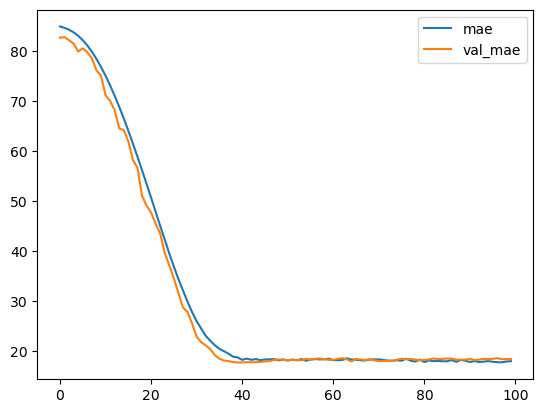

In [48]:
history_df.loc[:, ['mae', 'val_mae']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# $Linear$ $regression$
We're gonna use the same set of X_train, X_test, y_train and y_test data in the first section

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Building the logistique regression model

In [187]:
df_ozone1=df_ozone.copy()
df_ozone1.dropna(inplace=True)
X_rl=df_ozone1.drop('maxO3l',axis=1)
y_rl=df_ozone1['maxO3l']

In [188]:
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(X_rl, y_rl, train_size=0.8)

In [190]:
X_train_rl.drop('date',axis=1, inplace=True)
X_test_rl.drop('date',axis=1, inplace=True)

In [196]:
from sklearn.linear_model import LinearRegression
logistic_model_v1 = LinearRegression().fit(X_train_rl, y_train_rl)
#predicted values
y_pred = logistic_model_v1.predict(X_test_rl)

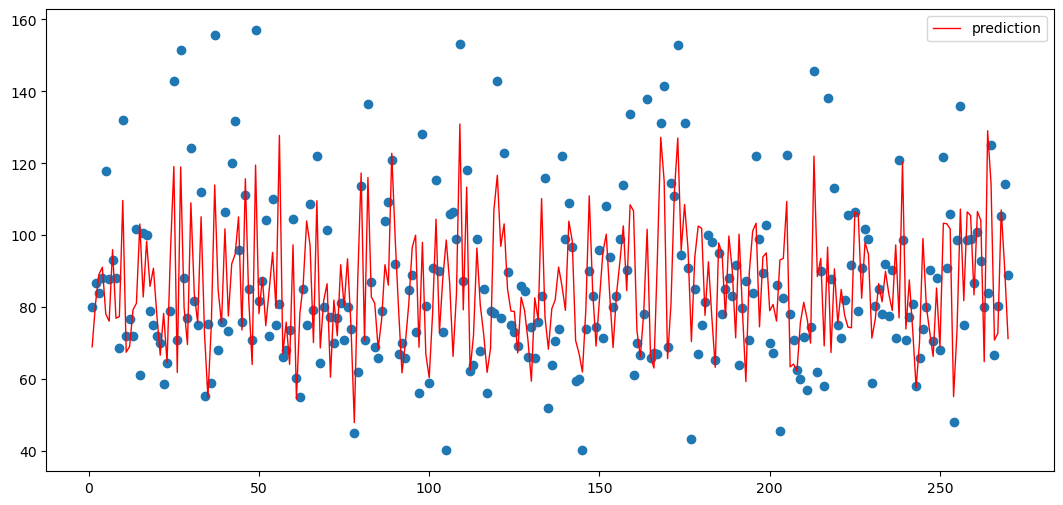

In [194]:
x=range(1, len(y_test_rl) + 1)
y=y_test_rl
plt.figure(figsize=(13, 6))
plt.scatter(x,y)
# X_poly=PolynomialFeatures(3).fit_transform(x)

# model=LinearRegression().fit(x,y)
# model2=LinearRegression().fit(X_poly,y)
# y_pred=model1.predict(X_test)
# y_pred2=model2.predict(X_poly)
plt.plot(x,y_pred,c='r',lw=1,label='prediction')
# plt.plot(x,y_test_rl,c='g',lw=1,label='réel')
plt.legend()
plt.show()

In [197]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Supposons que y_true sont les valeurs réelles et y_pred sont les valeurs prédites par votre modèle
# Remplacez y_true et y_pred par vos données réelles et prédites

# Calcul de la MSE
mse = mean_squared_error(y_test_rl, y_pred)
print(f'Mean Squared Error: {mse}')

# Calcul de la MAE
mae = mean_absolute_error(y_test_rl, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 296.9191210938657
Mean Absolute Error: 13.039942536789297


In [252]:
from sklearn.preprocessing import PolynomialFeatures
X_poly=PolynomialFeatures(2).fit_transform(X_rl.drop('date',axis=1))
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y_rl, train_size=0.8)

logistic_model_v2 = LinearRegression().fit(X_train_poly, y_train)
#predicted values
y_pred_poly = logistic_model_v2.predict(X_test_poly)

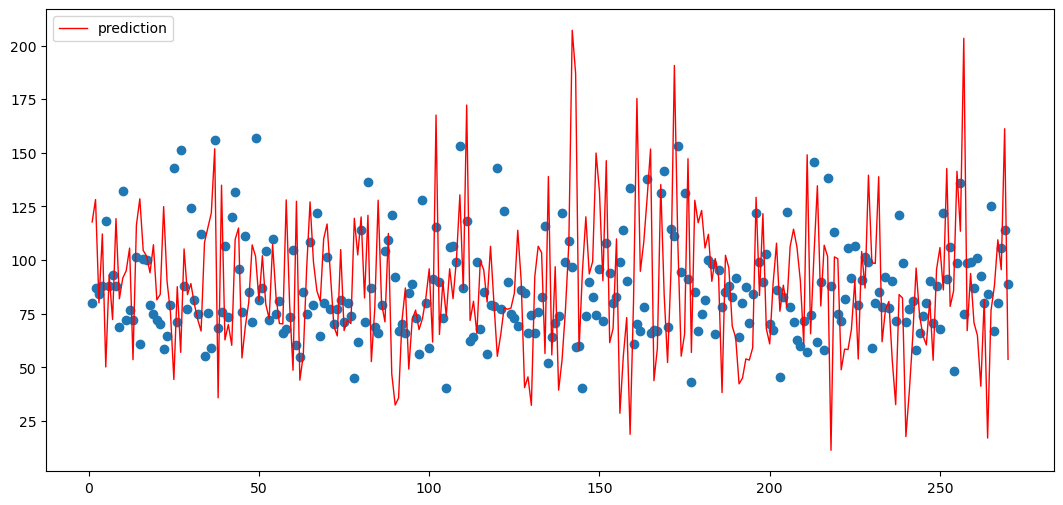

In [253]:
x=range(1, len(y_test_rl) + 1)
y=y_test_rl
plt.figure(figsize=(13, 6))
plt.scatter(x,y)
# X_poly=PolynomialFeatures(3).fit_transform(x)

# model=LinearRegression().fit(x,y)
# model2=LinearRegression().fit(X_poly,y)
# y_pred=logistic_model_v1.predict(X_train_rl)
# y_pred2=model2.predict(X_poly)
plt.plot(x,y_pred_poly,c='r',lw=1,label='prediction')
# plt.plot(x,y_test_rl,c='g',lw=1,label='réel')
plt.legend()
plt.show()

In [254]:
mse = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error: {mse}')

# Calcul de la MAE
mae = mean_absolute_error(y_test, y_pred_poly)
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 926.4436368911513
Mean Absolute Error: 23.80750334068581


## Evaluating the model

### Confusion matrix

In [37]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

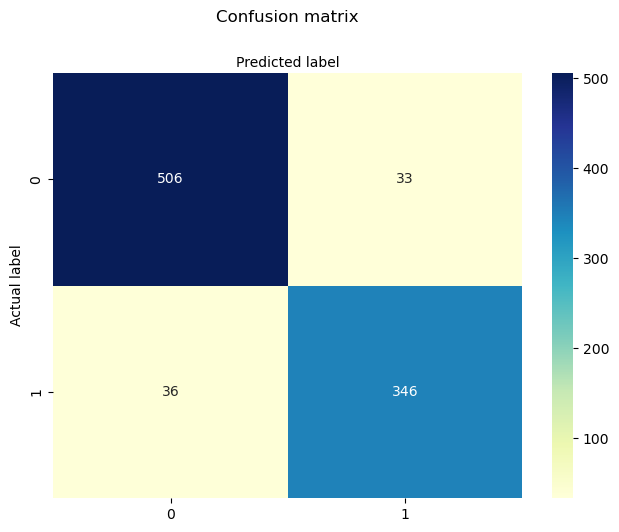

In [38]:
#visualizing the confusion matrix
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
from sklearn.metrics import classification_report
target_names = ['not spam', 'spam']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    not spam       0.93      0.94      0.94       539
        spam       0.91      0.91      0.91       382

    accuracy                           0.93       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



In [40]:
import matplotlib.pyplot as plt


# Prédiction sur l'ensemble d'entraînement et de validation
y_train_pred = logistic_model_v1.predict(X_train)

y_test_pred = logistic_model_v1.predict(X_test)

# Calcul de l'accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy sur l'ensemble d'entraînement : {train_accuracy}")

print(f"Accuracy sur l'ensemble de validation : {test_accuracy}")

Accuracy sur l'ensemble d'entraînement : 0.9304347826086956
Accuracy sur l'ensemble de validation : 0.9250814332247557


### ROC Curve 

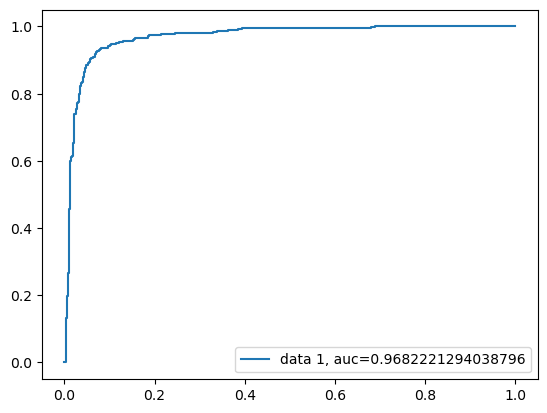

In [41]:
y_pred_proba = logistic_model_v1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Validation croisée 
Nous allons utilisé **GridSearchCV**  pour trouver les meilleurs hyperparamètres d'un modèle tout en utilisant la validation croisée pour évaluer les performances. 

In [42]:
from sklearn.model_selection import GridSearchCV
#model
logistic_model = LogisticRegression()

# Grille des hyperparamètres à explorer
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear'],
    'max_iter': [500, 1000]
}

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=6, scoring='accuracy')

# Exécution de la recherche par grille avec validation croisée
grid_search.fit(X_train, y_train)

# Récupération des meilleurs hyperparamètres et du meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Meilleurs hyperparamètres :", best_params)
print("Meilleur score obtenu :", best_score)

Meilleurs hyperparamètres : {'C': 1.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Meilleur score obtenu : 0.9317904859070483


Choix final des hyperparams

In [43]:
logistic_model = LogisticRegression(penalty='l1', max_iter=500, solver='liblinear', C=10, random_state=16).fit(X_train, y_train)

Evaluation du modèle finale 

Text(0.5, 427.9555555555555, 'Predicted label')

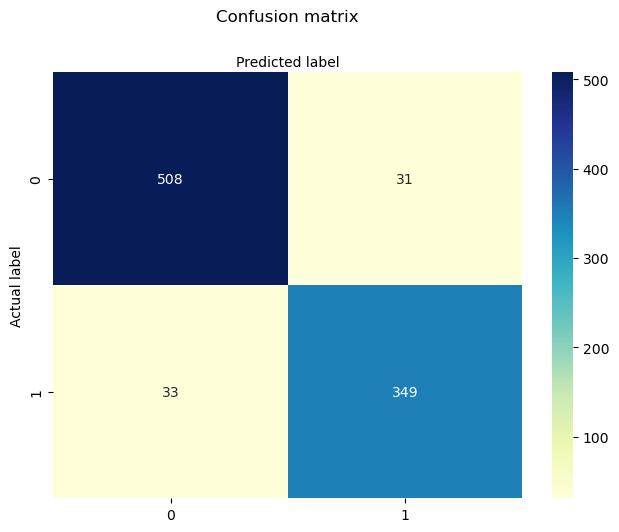

In [44]:
import seaborn as sns
y_pred = logistic_model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [45]:
target_names = ['not spam', 'spam']
accuracy_LR_test = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy_LR_test)
print(classification_report(y_test, y_pred, target_names=target_names))


Précision du modèle : 0.9305103148751357
              precision    recall  f1-score   support

    not spam       0.94      0.94      0.94       539
        spam       0.92      0.91      0.92       382

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



In [46]:
import matplotlib.pyplot as plt


# Prédiction sur l'ensemble d'entraînement et de validation
y_train_pred = logistic_model.predict(X_train)

y_test_pred = logistic_model.predict(X_test)

# Calcul de l'accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy sur l'ensemble d'entraînement : {train_accuracy}")

print(f"Accuracy sur l'ensemble de validation : {test_accuracy}")

Accuracy sur l'ensemble d'entraînement : 0.9353260869565218
Accuracy sur l'ensemble de validation : 0.9305103148751357


ROC Curve

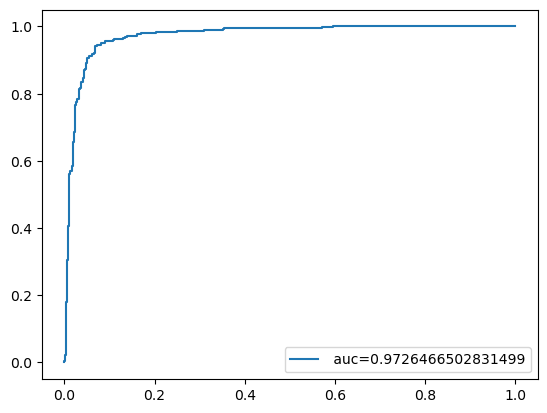

In [47]:
y_pred_proba = logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

- Resumé :

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score
models=[logistic_model_v1,logistic_model]
y_pred_v1=logistic_model_v1.predict(X_test)
y_pred_v2=logistic_model.predict(X_test)
y_pred=[y_pred_v1,y_pred_v2]
Metrics=pd.DataFrame({
    i:[accuracy_score(y_test,j),
    precision_score(j,y_test),
    recall_score(j, y_test),
    f1_score(j,y_test)] 
    for i,j in zip (models,y_pred)},
    index=['Accuracy','Precision','Recall','F1'])
Metrics

,"LogisticRegression(C=0.1, max_iter=1000, random_state=16)","LogisticRegression(C=10, max_iter=500, penalty='l1', random_state=16,\n solver='liblinear')"
Accuracy,0.925081,0.930510
Precision,0.905759,0.913613
Recall,0.912929,0.918421
F1,0.909330,0.916010


<b><font color=red> Résultat : </font></b>

- Après que nous avons utilisé la validation croisée nous avons eu des meilleurs résultats.

# Gradient boosting

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



# Initialisation du modèle de Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Entraînement du modèle sur les données d'entraînement
gradient_boosting_model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = gradient_boosting_model.predict(X_test)

# Évaluation des performances du modèle
target_names = ['not spam', 'spam']
accuracy_GB_test = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred,target_names=target_names)

print("Précision du modèle :", accuracy_GB_test)
print("Rapport de classification :\n", report)


Précision du modèle : 0.9413680781758957
Rapport de classification :
               precision    recall  f1-score   support

    not spam       0.95      0.96      0.95       580
        spam       0.93      0.91      0.92       341

    accuracy                           0.94       921
   macro avg       0.94      0.93      0.94       921
weighted avg       0.94      0.94      0.94       921



### Entrainement avec X_pca

In [51]:
X_train_PCA, X_test_PCA, y_train, y_test = train_test_split(X_pca, y, train_size=0.8)

In [52]:
# Initialisation du modèle de Gradient Boosting Classifier
gradient_boosting_model_PCA = GradientBoostingClassifier(random_state=42)

# Entraînement du modèle sur les données d'entraînement
gradient_boosting_model_PCA.fit(X_train_PCA, y_train)

# Prédiction sur les données de test
y_pred = gradient_boosting_model.predict(X_test_PCA)

# Évaluation des performances du modèle
target_names = ['not spam', 'spam']
accuracy_GBPCA_test = accuracy_score(y_test, y_pred)
report1 = classification_report(y_test, y_pred,target_names=target_names)

print("Précision du modèle :", accuracy_GBPCA_test)
print("Rapport de classification :\n", report1)


c:\Users\zaiss\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Précision du modèle : 0.6178067318132465
Rapport de classification :
               precision    recall  f1-score   support

    not spam       0.64      0.90      0.75       588
        spam       0.40      0.12      0.19       333

    accuracy                           0.62       921
   macro avg       0.52      0.51      0.47       921
weighted avg       0.56      0.62      0.55       921



### Normalisation des données 

In [53]:
from sklearn.preprocessing import StandardScaler

# Créez un objet StandardScaler
scaler = StandardScaler()
X_norm=scaler.fit_transform(X_pca)
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.8)

In [54]:
# Initialisation du modèle de Gradient Boosting Classifier
gradient_boosting_model_norm = GradientBoostingClassifier(random_state=42)

# Entraînement du modèle sur les données d'entraînement
gradient_boosting_model_norm.fit(X_norm_train, y_train)

# Prédiction sur les données de test
y_pred = gradient_boosting_model.predict(X_norm_test)

# Évaluation des performances du modèle
target_names = ['not spam', 'spam']
accuracy_GBnorm_test = accuracy_score(y_test, y_pred)
report2 = classification_report(y_test, y_pred,target_names=target_names)

print("Précision du modèle :", accuracy_GBnorm_test)
print("Rapport de classification :\n", report2)


Précision du modèle : 0.5787187839305103
Rapport de classification :
               precision    recall  f1-score   support

    not spam       0.60      0.87      0.71       550
        spam       0.43      0.15      0.22       371

    accuracy                           0.58       921
   macro avg       0.52      0.51      0.46       921
weighted avg       0.53      0.58      0.51       921



c:\Users\zaiss\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


# Evaluating the Three best models :

In [55]:
print(f'accuracy logistic regression :{accuracy_LR_test},accuracy DNN {accuracy_DNN}, accuracy Gradient boosting {accuracy_GB_test}')

accuracy logistic regression :0.9305103148751357,accuracy DNN 0.9239956736564636, accuracy Gradient boosting 0.9413680781758957


In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score
models=[model1,logistic_model,gradient_boosting_model]
y_pred_model=model1.predict(X_test)
y_pred_model = (y_pred_model > 0.5).astype(int)
y_pred_logistic=logistic_model.predict(X_test)
y_pred_gradb=gradient_boosting_model.predict(X_test)

y_pred=[y_pred_model,y_pred_logistic, y_pred_gradb]
Metrics=pd.DataFrame({
    str(i):[accuracy_score(y_test,j),
    precision_score(j,y_test),
    recall_score(j, y_test),
    f1_score(j,y_test)] 
    for i,j in zip (models,y_pred)},
    index=['Accuracy','Precision','Recall','F1'])
Metrics

29/29 [==============================] - 2s 4ms/step


,<keras.src.engine.sequential.Sequential object at 0x0000021C6B528AD0>,"LogisticRegression(C=10, max_iter=500, penalty='l1', random_state=16,\n solver='liblinear')",GradientBoostingClassifier(random_state=42)
Accuracy,0.517915,0.504886,0.496200
Precision,0.307278,0.331536,0.323450
Recall,0.378738,0.371601,0.360360
F1,0.339286,0.350427,0.340909
